In [1]:
import h5py
import os
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
sigmat_size = [256, 256]    
compression_lvl = 9 # pick between 0 and 9

In [4]:
modality = 'linear'
modality = 'multi'

split = 'train'
folder = f'MIAreview/Syn/Train/Reconstructions/old_syn_{split}_{modality}_sigmat_multisegment/'

In [5]:
files = sorted([f for f in os.listdir(folder) if '.h5' in f])

In [6]:
files_order = {}
for f in files:
    files_order[int(f.split('_')[-2])] = f

In [7]:
for k in sorted(files_order.keys()):
    print(k, files_order[k])

0 old_syn_train_multi_sigmat_multisegment_0_500.h5
500 old_syn_train_multi_sigmat_multisegment_500_1000.h5
1000 old_syn_train_multi_sigmat_multisegment_1000_1500.h5
1500 old_syn_train_multi_sigmat_multisegment_1500_2000.h5
2000 old_syn_train_multi_sigmat_multisegment_2000_2500.h5
2500 old_syn_train_multi_sigmat_multisegment_2500_3000.h5
3000 old_syn_train_multi_sigmat_multisegment_3000_3500.h5
3500 old_syn_train_multi_sigmat_multisegment_3500_4000.h5
4000 old_syn_train_multi_sigmat_multisegment_4000_4500.h5
4500 old_syn_train_multi_sigmat_multisegment_4500_5000.h5
5000 old_syn_train_multi_sigmat_multisegment_5000_5400.h5


In [8]:
i = 0
file = os.path.join(folder, files[i])

In [9]:
file = h5py.File(os.path.join(folder, files[i]), 'r')

In [10]:
file

<HDF5 file "old_syn_train_multi_sigmat_multisegment_0_500.h5" (mode r)>

In [22]:
nimgs = 5400
mode = 'ElasticNet 1e-5'
data = {}
fname_h5 = os.path.join('MIAreview/Syn/', f'syn_{split}_{modality}.h5')
# with h5py.File(fname_h5, 'w', libver='latest') as h5_fh:
#     data[mode] =\
#         h5_fh.create_dataset(mode,
#         shape=[nimgs] + sigmat_size, 
#         dtype=np.float32, chunks=tuple([1] + sigmat_size),
#         compression='gzip', compression_opts=compression_lvl)

# i = 0        
# with h5py.File(fname_h5, 'a', libver='latest') as h5_fh:
#     for k in sorted(files_order.keys()):
#         print(k, files_order[k])
#         file = h5py.File(os.path.join(folder, files_order[k]), 'r')
#         for j in range(len(file[mode])):
#             h5_fh[mode][i] = file[mode][j]
#             i += 1

In [23]:
file = h5py.File(fname_h5, 'r')[mode]
# file_name = '/home/anna/ResultsSignalDA/GT_syn/old_syn'
# split = 'train'
# file = h5py.File(f"{file_name}_train_multi_sigmat_multisegment.h5", 'r')['BackProjection']

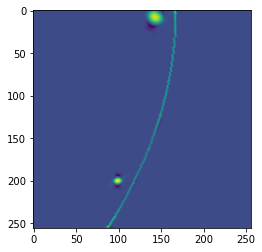

In [28]:
i = np.random.choice(nimgs)
plt.imshow(file[2000])

In [14]:
intensity = [nimgs]
for i in range(nimgs):
    intensity.append(file[i].max())

In [15]:
np.array(intensity)

array([5.40000000e+03, 2.90723950e-01, 5.87148070e-01, ...,
       4.84253824e-01, 3.46493304e-01, 5.59230804e-01])

In [16]:
np.where(intensity == 0)

(array([], dtype=int64),)

In [8]:
real_file = f'/home/anna/ResultsSignalDA/GT_real/arm_test_{modality}_sigmat_multisegment.h5'

In [11]:
file = h5py.File(real_file, 'r')


In [13]:
file.keys()

<KeysViewHDF5 ['BackProjection']>

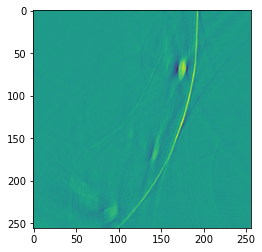

In [14]:
plt.imshow(file['BackProjection'][0])

In [15]:
file_linbm_en = '/home/anna/ResultsSignalDA/MIAvalidation_olddataset/Benchmark_LinearGT_EN/Reconstructions/arm_linear_sigmat_multisegment/arm_linear_sigmat_multisegment.h5'
linbm_rec_en = h5py.File(file_linbm_en, 'r')
linear_GT_en = linbm_rec_en['ElasticNet 1e-5']

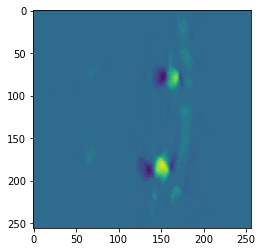

In [26]:
plt.imshow(linear_GT_en[1000])